# Capstone project: The battle of neighbohoods

Peer graded assignment of: Alessandro

# Monza e Brianza restaurant choice

## 1. Introduction/Business problem

I live in Monza, in Northern Italy: Monza is the capital of the "Monza e Brianza" province. For the sack of semplcity let's call the province *"MB"* for short, like the car plate.

MB territory encompass more or less a circle of *12 Km* as radius and it is well placed between Milan and the Lake of Como district, so it attract many tourists and many business men as well that use MB province as a referemnce point for their affairs in Milan or spend a couple of days around the lake. Morever MB hosts different fairs during years and, of course, the National Italian Formula 1 GP.
The problem I am going to face and propose as final capstone of this course is to help tourist and business men in finding restaurants of different type in the whole MB province: not only national ones (italian) but also ethnic restaurants and how they are clustered and distribuited over the territory in order help people to orient themself to a particular zone of MB province for their living.

**The business question is**: *how are distribuited the restaurants types in MB province, so can meet better foreign people taste and gastronomy palates?* 

## 2. Data section

First of all I have scrapt in Internet looking for the list of all municipality that MB province is made of. It means name and zip code. \
This can be found following this link: https://zip-codes.nonsolocap.it/lombardy/20-cap-province-of-monza-and-brianza

Then I will use Foursquare in order to retrieve the restaurant of all the municipalityof MB province throught the API the system supply to the developer with its program: https://developer.foursquare.com/docs/places-api/endpoints/

Data will be cleaned in order to give them concistency and them analized and clustered. Some data have been normalized manually due to wrong classiication of Foursquare (about 50 items). The result will be published on https://github.com/alexfum75/Coursera_Capstone account, a hosting service for software project

This Jupyter notebook is also available onmy github account: https://github.com/alexfum75/Coursera_Capstone
Please be patient because it very heavy to load. As alternative you can download the Capstone repository, since it is public

The following paragraphs give you the process data flow in details. In the next assignment a report will be generated with methodology, result and conclusion about this assignment

### 2.1 Recover main data about "MB" province

Install libraries and clean all

In [2]:
%reset
import numpy as np 
import pandas as pd 

#!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Libraries installed.


Let's recover from zip-codes the postal code from all the municipalities from MB

In [3]:
df = pd.read_html('https://zip-codes.nonsolocap.it/lombardy/20-cap-province-of-monza-and-brianza')[1]

In [4]:
df

,Municipality,ZIP
0,Lentate sul Seveso,20823
1,Lesmo,20855
2,Limbiate,20812
3,Lissone,20851
4,Macherio,20846
5,Meda,20821
6,Mezzago,20883
7,Misinto,20826
8,Monza,20900
9,Muggiò,20835


There are 27 municipalities to MB province. The capital of the province is Monza

In [5]:
df.shape

(27, 2)

### 2.2 Recover main geospatial data from Foursquare app

In [6]:
#!conda install -c conda-forge geopy --yes

In [7]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Brianza_food")

df['City']= df['Municipality'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['City'].apply(pd.Series)

In [8]:
df

,Municipality,ZIP,City,Latitude,Longitude
0,Lentate sul Seveso,20823,"(45.6784049, 9.1181696)",45.678405,9.118170
1,Lesmo,20855,"(45.6489742, 9.3056521)",45.648974,9.305652
2,Limbiate,20812,"(45.5986047, 9.119731)",45.598605,9.119731
3,Lissone,20851,"(45.6107705, 9.2408409)",45.610771,9.240841
4,Macherio,20846,"(45.640116, 9.269371)",45.640116,9.269371
5,Meda,20821,"(45.6625046, 9.1567532)",45.662505,9.156753
6,Mezzago,20883,"(45.628977, 9.44485)",45.628977,9.444850
7,Misinto,20826,"(45.662375, 9.083941)",45.662375,9.083941
8,Monza,20900,"(45.5834418, 9.2735257)",45.583442,9.273526
9,Muggiò,20835,"(45.5931952, 9.2271378)",45.593195,9.227138


Let's remove useless columns

In [9]:
df.drop(['ZIP'], axis=1, inplace=True)

In [10]:
df

,Municipality,City,Latitude,Longitude
0,Lentate sul Seveso,"(45.6784049, 9.1181696)",45.678405,9.118170
1,Lesmo,"(45.6489742, 9.3056521)",45.648974,9.305652
2,Limbiate,"(45.5986047, 9.119731)",45.598605,9.119731
3,Lissone,"(45.6107705, 9.2408409)",45.610771,9.240841
4,Macherio,"(45.640116, 9.269371)",45.640116,9.269371
5,Meda,"(45.6625046, 9.1567532)",45.662505,9.156753
6,Mezzago,"(45.628977, 9.44485)",45.628977,9.444850
7,Misinto,"(45.662375, 9.083941)",45.662375,9.083941
8,Monza,"(45.5834418, 9.2735257)",45.583442,9.273526
9,Muggiò,"(45.5931952, 9.2271378)",45.593195,9.227138


### 2.3 Create the neighborhoods in "MB" province

Import libraries

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


Where is the capital of MB, Monza?

In [12]:
address = 'Monza'

geolocator = Nominatim(user_agent="Brianza_food")
location = geolocator.geocode(address)
neighborhood_latitude = location.latitude
neighborhood_longitude = location.longitude
print('The geograpical coordinate of Monza, the capital of "Monza e Brianza" is {}, {}.'.format(neighborhood_latitude, neighborhood_longitude))

The geograpical coordinate of Monza, the capital of "Monza e Brianza" is 45.5834418, 9.2735257.


Visualize all the others municipalities using Folium

In [13]:
# create map of Cologne using latitude and longitude 
map_cologne = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Municipality']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cologne) 
    
map_cologne

In [21]:
CLIENT_ID = 'CGVFFRUH0FCUAHMT2AKJVLFTRNPPUSMHVQUL1AFFFEHFAOUN' # your Foursquare ID
CLIENT_SECRET = 'HFMST0KRZDOBZXCF2SRMLSRVJFTO1S1KQPO3SB5BW3YG4IMG' # your Foursquare Secret
VERSION = 20180605 # Foursquare API version

In [22]:
neighborhood_name = df.loc[8, 'Municipality'] # Monza name

Let's show the venues in MB within a radius of 12 Km, more or less the size of MB province

In [23]:
LIMIT = 100

radius = 12000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [24]:
results = requests.get(url).json()

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-26-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Duomo di Monza,Church,45.583661,9.275154
1,Speedy,Sandwich Place,45.586956,9.270449
2,Villa Reale,Historic Site,45.592660,9.271688
3,Ristorante Il Moro,Seafood Restaurant,45.582681,9.271322
4,L'Albero dei Gelati,Ice Cream Shop,45.589246,9.261904


In [27]:
print('{} venues were returned by Foursquare in MB province calculated a circle with 15 Km of radius of Monza.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare in MB province calculated a circle with 15 Km of radius of Monza.


In [28]:
print ('{} unique categories in MB territory'.format(nearby_venues['categories'].value_counts().shape[0]))

48 unique categories in MB territory


In [29]:
print (nearby_venues['categories'].value_counts())

Italian Restaurant               13
Pizza Place                       6
Hotel                             6
Supermarket                       6
Park                              5
Dessert Shop                      5
Ice Cream Shop                    5
Café                              4
Gym Pool                          3
Burger Joint                      2
Wine Bar                          2
Vegetarian / Vegan Restaurant     2
Brewery                           2
Motorcycle Shop                   2
Furniture / Home Store            2
Racetrack                         2
Flower Shop                       2
Water Park                        1
Golf Course                       1
Pool                              1
Korean Restaurant                 1
Airport                           1
Sandwich Place                    1
Gym                               1
Soccer Field                      1
Women's Store                     1
Church                            1
Snack Place                 

### 2.4 Let's exploration of the neighbourhoods in MB province

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [31]:
Monza_Brianza_venues = getNearbyVenues(names=df['Municipality'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Lentate sul Seveso
Lesmo
Limbiate
Lissone
Macherio
Meda
Mezzago
Misinto
Monza
Muggiò
Nova Milanese
Ornago
Renate
Roncello
Ronco Briantino
Seregno
Seveso
Sovico
Sulbiate
Triuggio
Usmate Velate
Varedo
Vedano al Lambro
Veduggio con Colzano
Verano Brianza
Villasanta
Vimercate


In [32]:
Monza_Brianza_venues.shape

(1300, 7)

Let's identify all of them line by line, so later we can extract the restaurant from "Venue Category"

In [33]:
Monza_Brianza_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lentate sul Seveso,45.678405,9.118170,Antica Locanda La Lombarda,45.685466,9.120169,Italian Restaurant
1,Lentate sul Seveso,45.678405,9.118170,La Botanica,45.663056,9.107039,Farm
2,Lentate sul Seveso,45.678405,9.118170,Centro Sportivo Alte Groane,45.674810,9.108780,Tennis Court
3,Lentate sul Seveso,45.678405,9.118170,Il Delfino,45.656666,9.126513,Italian Restaurant
4,Lentate sul Seveso,45.678405,9.118170,Teatro Antonio Belloni,45.660907,9.129789,Arts & Entertainment
5,Lentate sul Seveso,45.678405,9.118170,Villa Hu,45.687513,9.109943,Sushi Restaurant
6,Lentate sul Seveso,45.678405,9.118170,Barlassina Country Club,45.652948,9.120136,Golf Course
7,Lentate sul Seveso,45.678405,9.118170,Golf Club Carimate,45.704846,9.116418,Golf Course
8,Lentate sul Seveso,45.678405,9.118170,i-Club,45.699212,9.135213,Nightclub
9,Lentate sul Seveso,45.678405,9.118170,Lazzate Sports Arena,45.682943,9.080653,Gym / Fitness Center


Let's clean again the data, becasue there are some row that contains a generic 'Restaurant' voice as "Venue Category"

In [34]:
generic_restaurant = Monza_Brianza_venues[Monza_Brianza_venues['Venue Category'] == ('Restaurant')]
generic_restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,Lentate sul Seveso,45.678405,9.118170,Osteria del Borgo,45.671070,9.085122,Restaurant
26,Lentate sul Seveso,45.678405,9.118170,Tri Basei,45.666292,9.149790,Restaurant
52,Lesmo,45.648974,9.305652,Please!,45.645187,9.306209,Restaurant
63,Lesmo,45.648974,9.305652,Ses Culon,45.639383,9.285753,Restaurant
66,Lesmo,45.648974,9.305652,Trattoria La Ca',45.631010,9.304794,Restaurant
82,Limbiate,45.598605,9.119731,Osteria Ravana,45.614695,9.090993,Restaurant
126,Limbiate,45.598605,9.119731,Antica Osteria Di Senago,45.572292,9.118507,Restaurant
148,Lissone,45.610771,9.240841,Trattoria del tacco,45.620850,9.214380,Restaurant
153,Lissone,45.610771,9.240841,Kaori sushi,45.609535,9.240886,Restaurant
176,Lissone,45.610771,9.240841,Locanda La Martina,45.631380,9.231245,Restaurant


In [35]:
generic_restaurant.shape

(50, 7)

Let's try to fix this 50 "false" restaurants on the original dataframe. Unfortunately they are all miscalassified as italian by Foursquare. So let's clean with 'pseudo-manual' intervention with a python  script. They are only few

In [36]:
for index, row in Monza_Brianza_venues.iterrows():
    # italian rest by default
    if Monza_Brianza_venues.loc[index,'Venue Category'] == 'Restaurant':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Italian Restaurant'
        
    # except this special ones
    if Monza_Brianza_venues.loc[index,'Venue'] == 'Kaori sushi':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Japanese Restaurant'
    if Monza_Brianza_venues.loc[index,'Venue'] == 'Sushi Restaurant':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Japanese Restaurant'
    if Monza_Brianza_venues.loc[index,'Venue'] == 'Ristorante Argentée':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Argentinian Restaurant'
    if Monza_Brianza_venues.loc[index,'Venue'] == 'Pescheria Ocean Food':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Seafood Restaurant'
    if Monza_Brianza_venues.loc[index,'Venue'] == 'Kangaroo':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Australian Restaurant'
    if Monza_Brianza_venues.loc[index,'Venue'] == 'Pura Brace':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'New American Restaurant'
       
    if Monza_Brianza_venues.loc[index,'Venue Category'] == 'Sushi Restaurant':
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Japanese Restaurant'
    
    # bar category is not a restaurant, it is wrong classified by Foursquare
    if 'Bar ' in Monza_Brianza_venues.loc[index,'Venue']:
        Monza_Brianza_venues.loc[index,'Venue Category'] = 'Pub'

In [37]:
Monza_Brianza_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lentate sul Seveso,45.678405,9.118170,Antica Locanda La Lombarda,45.685466,9.120169,Italian Restaurant
1,Lentate sul Seveso,45.678405,9.118170,La Botanica,45.663056,9.107039,Farm
2,Lentate sul Seveso,45.678405,9.118170,Centro Sportivo Alte Groane,45.674810,9.108780,Tennis Court
3,Lentate sul Seveso,45.678405,9.118170,Il Delfino,45.656666,9.126513,Italian Restaurant
4,Lentate sul Seveso,45.678405,9.118170,Teatro Antonio Belloni,45.660907,9.129789,Arts & Entertainment
5,Lentate sul Seveso,45.678405,9.118170,Villa Hu,45.687513,9.109943,Japanese Restaurant
6,Lentate sul Seveso,45.678405,9.118170,Barlassina Country Club,45.652948,9.120136,Golf Course
7,Lentate sul Seveso,45.678405,9.118170,Golf Club Carimate,45.704846,9.116418,Golf Course
8,Lentate sul Seveso,45.678405,9.118170,i-Club,45.699212,9.135213,Nightclub
9,Lentate sul Seveso,45.678405,9.118170,Lazzate Sports Arena,45.682943,9.080653,Gym / Fitness Center


Now data are clean and standardised

In [38]:
Monza_Brianza_venues[Monza_Brianza_venues['Venue Category'] == ('Restaurant')]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [39]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Monza_Brianza_only_restaurant = Monza_Brianza_venues[Monza_Brianza_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Monza_Brianza_only_restaurant.index = np.arange(1, len(Monza_Brianza_only_restaurant )+1)

In [40]:
print (Monza_Brianza_only_restaurant['Venue Category'].value_counts())

Italian Restaurant               160
Japanese Restaurant               43
Fast Food Restaurant              19
Chinese Restaurant                 8
Mexican Restaurant                 8
New American Restaurant            6
Mediterranean Restaurant           5
Seafood Restaurant                 4
Vegetarian / Vegan Restaurant      4
Roman Restaurant                   2
German Restaurant                  2
Argentinian Restaurant             2
Comfort Food Restaurant            2
Falafel Restaurant                 2
Paella Restaurant                  2
Kebab Restaurant                   2
Australian Restaurant              2
Greek Restaurant                   1
American Restaurant                1
Modern European Restaurant         1
Lombard Restaurant                 1
Name: Venue Category, dtype: int64


In [41]:
print('There are {} unique categories.'.format(len(Monza_Brianza_only_restaurant['Venue Category'].unique())))

There are 21 unique categories.


In [42]:
# create a dataframe of top 10 categories
Monza_Brianza_Top10 = Monza_Brianza_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Monza_Brianza_Top10=Monza_Brianza_Top10.reset_index()
Monza_Brianza_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Monza_Brianza_Top10

,Venue_Category,Frequency
0,Italian Restaurant,160
1,Japanese Restaurant,43
2,Fast Food Restaurant,19
3,Chinese Restaurant,8
4,Mexican Restaurant,8
5,New American Restaurant,6
6,Mediterranean Restaurant,5
7,Seafood Restaurant,4
8,Vegetarian / Vegan Restaurant,4
9,Roman Restaurant,2


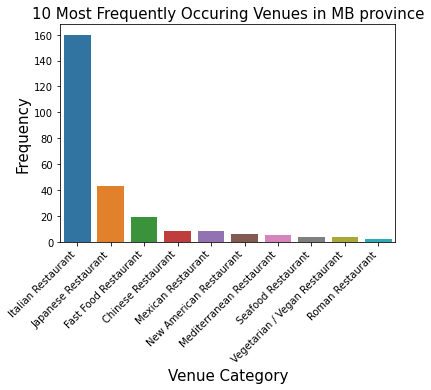

<Figure size 1296x504 with 0 Axes>

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Monza_Brianza_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in MB province', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

### 2.5 Size of the dataframe in MB province

In [44]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Monza_Brianza_only_restaurant.shape)
Monza_Brianza_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (277, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Lentate sul Seveso,45.678405,9.118170,Antica Locanda La Lombarda,45.685466,9.120169,Italian Restaurant
2,Lentate sul Seveso,45.678405,9.118170,Il Delfino,45.656666,9.126513,Italian Restaurant
3,Lentate sul Seveso,45.678405,9.118170,Villa Hu,45.687513,9.109943,Japanese Restaurant
4,Lentate sul Seveso,45.678405,9.118170,Trattoria Vecchia Fornace,45.688996,9.152583,Italian Restaurant
5,Lentate sul Seveso,45.678405,9.118170,Osteria del Borgo,45.671070,9.085122,Italian Restaurant
6,Lentate sul Seveso,45.678405,9.118170,Ristorante Torchio,45.702069,9.115669,Italian Restaurant
7,Lentate sul Seveso,45.678405,9.118170,Burger King,45.692270,9.102280,Fast Food Restaurant
8,Lentate sul Seveso,45.678405,9.118170,McDonald's,45.690843,9.104847,Fast Food Restaurant
9,Lentate sul Seveso,45.678405,9.118170,Osteria al laghet,45.694000,9.137600,Italian Restaurant
10,Lentate sul Seveso,45.678405,9.118170,Tri Basei,45.666292,9.149790,Italian Restaurant


In [45]:
Monza_Brianza_restaurant = Monza_Brianza_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

### 2.6 Analysis of the neighbourhoods

In [46]:
Monza_Brianza_restaurant

Neighborhood
Lentate sul Seveso      10
Lesmo                   15
Limbiate                 9
Lissone                 15
Macherio                10
Meda                    11
Mezzago                  6
Misinto                  4
Monza                   21
Muggiò                  15
Nova Milanese           10
Ornago                   5
Renate                   4
Roncello                 6
Ronco Briantino          3
Seregno                 15
Seveso                   9
Sovico                   8
Sulbiate                 1
Triuggio                10
Usmate Velate            6
Varedo                  15
Vedano al Lambro        22
Veduggio con Colzano     2
Verano Brianza          13
Villasanta              18
Vimercate               14
Name: Venue Category, dtype: int64

In [47]:
Monza_Brianza_restaurant_df  = Monza_Brianza_restaurant.to_frame().reset_index()
Monza_Brianza_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Monza_Brianza_restaurant_df.index = np.arange(1, len(Monza_Brianza_restaurant_df)+1)
list_rest_no = Monza_Brianza_restaurant_df['Number of Restaurant'].to_list()
list_dist =Monza_Brianza_restaurant_df['Neighborhood'].to_list()

In [48]:
# one hot encoding
Monza_Brianza_onehot = pd.get_dummies(Monza_Brianza_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Monza_Brianza_onehot['Neighborhood'] = Monza_Brianza_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Monza_Brianza_onehot.columns[-1]] + list(Monza_Brianza_onehot.columns[:-1])
Monza_Brianza_onehot = Monza_Brianza_onehot[fixed_columns]

Monza_Brianza_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Lombard Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,New American Restaurant,Paella Restaurant,Roman Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
1,Lentate sul Seveso,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Lentate sul Seveso,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Lentate sul Seveso,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Lentate sul Seveso,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Lentate sul Seveso,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Again, the size ....

In [49]:
Monza_Brianza_onehot.shape

(277, 22)

### 2.7 Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants

In [50]:
Monza_Brianza_grouped = Monza_Brianza_onehot.groupby('Neighborhood').mean().reset_index()
Monza_Brianza_grouped

,Neighborhood,American Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Lombard Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,New American Restaurant,Paella Restaurant,Roman Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant
0,Lentate sul Seveso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.700000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
1,Lesmo,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.00,0.866667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
2,Limbiate,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.00,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
3,Lissone,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.00,0.333333,0.200000,0.000000,0.066667,0.066667,0.133333,0.000000,0.066667,0.000,0.000000,0.000000,0.000000
4,Macherio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100,0.000000,0.000000,0.000000
5,Meda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.818182,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
6,Mezzago,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.00,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
7,Misinto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
8,Monza,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.00,0.571429,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.047619,0.047619,0.047619
9,Muggiò,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.00,0.266667,0.333333,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.000,0.066667,0.000000,0.000000


In [51]:
Monza_Brianza_grouped.shape

(27, 22)

### 2.8 Print the neighbourhoods with their respective top 10 most common venues.

In [52]:
num_top_venues = 10

for hood in Monza_Brianza_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Monza_Brianza_grouped[Monza_Brianza_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Lentate sul Seveso----
                        venue  freq
0          Italian Restaurant   0.7
1        Fast Food Restaurant   0.2
2         Japanese Restaurant   0.1
3          Lombard Restaurant   0.0
4          Seafood Restaurant   0.0
5            Roman Restaurant   0.0
6           Paella Restaurant   0.0
7     New American Restaurant   0.0
8  Modern European Restaurant   0.0
9          Mexican Restaurant   0.0


----Lesmo----
                        venue  freq
0          Italian Restaurant  0.87
1          Chinese Restaurant  0.13
2         American Restaurant  0.00
3          Lombard Restaurant  0.00
4          Seafood Restaurant  0.00
5            Roman Restaurant  0.00
6           Paella Restaurant  0.00
7     New American Restaurant  0.00
8  Modern European Restaurant  0.00
9          Mexican Restaurant  0.00


----Limbiate----
                        venue  freq
0          Italian Restaurant  0.44
1         Japanese Restaurant  0.33
2          Chinese Restaurant  0.11
3 

### 2.9 Creating a pandas dataframe

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Monza_Brianza_grouped['Neighborhood']

for ind in np.arange(Monza_Brianza_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Monza_Brianza_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lentate sul Seveso,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,Lesmo,Italian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
2,Limbiate,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
3,Lissone,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Argentinian Restaurant
4,Macherio,Italian Restaurant,Paella Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Meda,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
6,Mezzago,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
7,Misinto,Italian Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
8,Monza,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Roman Restaurant,Mexican Restaurant,Mediterranean Restaurant,Lombard Restaurant
9,Muggiò,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Roman Restaurant,Mediterranean Restaurant,Comfort Food Restaurant,Fast Food Restaurant,German Restaurant,Argentinian Restaurant,Australian Restaurant


### 2.10 Clustering the neighbourhoods with k-means

Do not optimize the value of k, let's consider k=5

In [55]:
# set number of clusters (I choose 5)
kclusters = 5

Monza_Brianza_grouped_clustering = Monza_Brianza_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Monza_Brianza_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 1, 3, 4, 4, 1, 4, 2, 3])

In [56]:
Monza_Brianza_merged = df
Monza_Brianza_merged.head(10)

,Municipality,City,Latitude,Longitude
0,Lentate sul Seveso,"(45.6784049, 9.1181696)",45.678405,9.118170
1,Lesmo,"(45.6489742, 9.3056521)",45.648974,9.305652
2,Limbiate,"(45.5986047, 9.119731)",45.598605,9.119731
3,Lissone,"(45.6107705, 9.2408409)",45.610771,9.240841
4,Macherio,"(45.640116, 9.269371)",45.640116,9.269371
5,Meda,"(45.6625046, 9.1567532)",45.662505,9.156753
6,Mezzago,"(45.628977, 9.44485)",45.628977,9.444850
7,Misinto,"(45.662375, 9.083941)",45.662375,9.083941
8,Monza,"(45.5834418, 9.2735257)",45.583442,9.273526
9,Muggiò,"(45.5931952, 9.2271378)",45.593195,9.227138


In [57]:
neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lentate sul Seveso,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,Lesmo,Italian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
2,Limbiate,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
3,Lissone,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Argentinian Restaurant
4,Macherio,Italian Restaurant,Paella Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Meda,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
6,Mezzago,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
7,Misinto,Italian Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
8,Monza,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Roman Restaurant,Mexican Restaurant,Mediterranean Restaurant,Lombard Restaurant
9,Muggiò,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Roman Restaurant,Mediterranean Restaurant,Comfort Food Restaurant,Fast Food Restaurant,German Restaurant,Argentinian Restaurant,Australian Restaurant


In [58]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [59]:
neighborhoods_venues_sorted_w_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lentate sul Seveso,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,Lesmo,Italian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
2,Limbiate,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
3,Lissone,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Argentinian Restaurant
4,Macherio,Italian Restaurant,Paella Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Meda,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
6,Mezzago,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
7,Misinto,Italian Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
8,Monza,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Roman Restaurant,Mexican Restaurant,Mediterranean Restaurant,Lombard Restaurant


In [60]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [61]:
neighborhoods_venues_sorted_w_clusters.head(23)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Lentate sul Seveso,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,4,Lesmo,Italian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
2,1,Limbiate,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
3,3,Lissone,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Argentinian Restaurant
4,4,Macherio,Italian Restaurant,Paella Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,4,Meda,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
6,1,Mezzago,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
7,4,Misinto,Italian Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
8,2,Monza,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Roman Restaurant,Mexican Restaurant,Mediterranean Restaurant,Lombard Restaurant
9,3,Muggiò,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Roman Restaurant,Mediterranean Restaurant,Comfort Food Restaurant,Fast Food Restaurant,German Restaurant,Argentinian Restaurant,Australian Restaurant


In [62]:
Monza_Brianza_merged.rename(columns={'Municipality':'Neighborhood'}, inplace=True)

Monza_Brianza_merged = Monza_Brianza_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Monza_Brianza_merged.head(10)

,Neighborhood,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lentate sul Seveso,"(45.6784049, 9.1181696)",45.678405,9.118170,2,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
1,Lesmo,"(45.6489742, 9.3056521)",45.648974,9.305652,4,Italian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
2,Limbiate,"(45.5986047, 9.119731)",45.598605,9.119731,1,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
3,Lissone,"(45.6107705, 9.2408409)",45.610771,9.240841,3,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Argentinian Restaurant
4,Macherio,"(45.640116, 9.269371)",45.640116,9.269371,4,Italian Restaurant,Paella Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Meda,"(45.6625046, 9.1567532)",45.662505,9.156753,4,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
6,Mezzago,"(45.628977, 9.44485)",45.628977,9.444850,1,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
7,Misinto,"(45.662375, 9.083941)",45.662375,9.083941,4,Italian Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
8,Monza,"(45.5834418, 9.2735257)",45.583442,9.273526,2,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Roman Restaurant,Mexican Restaurant,Mediterranean Restaurant,Lombard Restaurant
9,Muggiò,"(45.5931952, 9.2271378)",45.593195,9.227138,3,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Roman Restaurant,Mediterranean Restaurant,Comfort Food Restaurant,Fast Food Restaurant,German Restaurant,Argentinian Restaurant,Australian Restaurant


Finally, let's visualize the resulting clusters.

In [63]:
# create a map with folium
map_restaurants10 = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], 
                               zoom_start=11,
                              title="Clustering MB province by restaurant type")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Monza_Brianza_merged['Latitude'], 
                                  Monza_Brianza_merged['Longitude'], 
                                  Monza_Brianza_merged['Neighborhood'], 
                                  Monza_Brianza_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

### 2.11 Examination of the clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

***Cluster 1***

In [64]:
Monza_Brianza_merged.loc[Monza_Brianza_merged['Cluster Labels'] == 0, Monza_Brianza_merged.columns[[0] + list(range(5, Monza_Brianza_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Ornago,Italian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
12,Renate,Italian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
14,Ronco Briantino,Italian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
18,Sulbiate,Italian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
19,Triuggio,Italian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
23,Veduggio con Colzano,Italian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant


This **cluster 1** the most common restaurant types are:
    1. italian
    2. Vegetarian
    3. Argentinian

***Cluster 2***

In [65]:
Monza_Brianza_merged.loc[Monza_Brianza_merged['Cluster Labels'] == 1, Monza_Brianza_merged.columns[[0] + list(range(5, Monza_Brianza_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Limbiate,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
6,Mezzago,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
10,Nova Milanese,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,New American Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant
13,Roncello,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
15,Seregno,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,Kebab Restaurant,Argentinian Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Lombard Restaurant,Mexican Restaurant
16,Seveso,Italian Restaurant,Japanese Restaurant,Falafel Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
21,Varedo,Italian Restaurant,Japanese Restaurant,Fast Food Restaurant,New American Restaurant,Chinese Restaurant,Mediterranean Restaurant,Seafood Restaurant,German Restaurant,Argentinian Restaurant,Australian Restaurant


This **cluster 2** the most common restaurant types are:
    1. italian
    2. Japanese
    3. Fast Food

***Cluster 3***

In [66]:
Monza_Brianza_merged.loc[Monza_Brianza_merged['Cluster Labels'] == 2, Monza_Brianza_merged.columns[[0] + list(range(5, Monza_Brianza_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lentate sul Seveso,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Greek Restaurant
8,Monza,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Roman Restaurant,Mexican Restaurant,Mediterranean Restaurant,Lombard Restaurant
22,Vedano al Lambro,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,New American Restaurant,Lombard Restaurant,Kebab Restaurant
24,Verano Brianza,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Mexican Restaurant,Seafood Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant
25,Villasanta,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Argentinian Restaurant,Japanese Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant


This **cluster 3** the most common restaurant types are:
    1. italian
    2. Fast Food
    3. japanese

***Cluster 4***

In [67]:
Monza_Brianza_merged.loc[Monza_Brianza_merged['Cluster Labels'] == 3, Monza_Brianza_merged.columns[[0] + list(range(5, Monza_Brianza_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Lissone,Italian Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Lombard Restaurant,Comfort Food Restaurant,Falafel Restaurant,German Restaurant,Argentinian Restaurant
9,Muggiò,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Roman Restaurant,Mediterranean Restaurant,Comfort Food Restaurant,Fast Food Restaurant,German Restaurant,Argentinian Restaurant,Australian Restaurant
26,Vimercate,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Australian Restaurant,Chinese Restaurant,German Restaurant,Kebab Restaurant,American Restaurant,Lombard Restaurant,Mexican Restaurant


This **cluster 4** the most common restaurant types are:
    1. italian
    2. Japanese
    3. Mexican

***Cluster 5***

In [68]:
Monza_Brianza_merged.loc[Monza_Brianza_merged['Cluster Labels'] == 4, Monza_Brianza_merged.columns[[0] + list(range(5, Monza_Brianza_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Lesmo,Italian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
4,Macherio,Italian Restaurant,Paella Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Meda,Italian Restaurant,Japanese Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant
7,Misinto,Italian Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
17,Sovico,Italian Restaurant,Paella Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Australian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant
20,Usmate Velate,Italian Restaurant,Australian Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Greek Restaurant


This **cluster 5** the most common restaurant types are:
    1. Italian
    2. Mediterranean (spanish, greek)

***In the next assignment I will give a structure to the data and summarize these steps inside a report.***

# That's it. Thanks for reading!